<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week- 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

**Import the required libraries**

In [2]:
# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [7]:
# load the csv file

# type your code here

df_lifeExp = pd.read_csv('Life_Expectancy.csv',index_col='Country')
df_lifeExp.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [8]:
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Status              124 non-null    object 
 1   Adult_Mortality     124 non-null    int64  
 2   Infant_Deaths       124 non-null    int64  
 3   Hepatitis           124 non-null    int64  
 4   Measles             124 non-null    int64  
 5    BMI                124 non-null    float64
 6   Underfive_Deaths    124 non-null    int64  
 7   Polio               124 non-null    int64  
 8   Diphtheria          124 non-null    int64  
 9    HIV                124 non-null    float64
 10  GDP                 124 non-null    float64
 11  Population          124 non-null    int64  
 12  Malnourished10_19   124 non-null    float64
 13  Malnourished5_9     124 non-null    float64
 14  Income_Index        124 non-null    float64
 15  Schooling           124 non-null    float64
 16

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

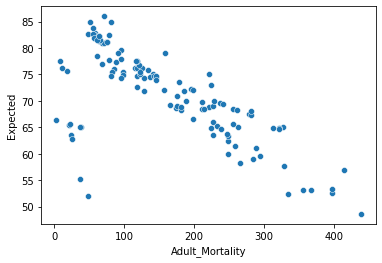

In [10]:
# type your code here

sns.scatterplot(df_lifeExp['Adult_Mortality'],df_lifeExp.Expected)
plt.show()

In [11]:
# Negativel Correlated
#Increase in Expctancy decreases Adult Mortality

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

# selecting independent variables that describe immunization
X = df_lifeExp['Income_Index']

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp.Expected

# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,X).fit()

# capture predicted values
predictions = SLR_model.predict(X)

# find the residuals
residual = df_lifeExp.Expected - predictions

# calculate the sum of residuals
sum_resid = np.sum(residual)


In [14]:
# display the 13 digits after decimal
#"{:.13f}". format(): displays the 13 digits after decimal
output_residual = "{:.13f}". format(np.sum(residual))

# print sum of residuals
print("Sum of all residuals",output_residual)

# get the total number of rows
#len(): gives the count of the observations
sample_size = len(df_lifeExp.index)

# calculate expected value for residuals
expected_value = sum_resid/sample_size

# for suppressing the e symbol format of printing output
#"{:.13f}". format(): displays the 13 digits after decimal
output = "{:.13f}". format(expected_value)

# print expected residual value
print("Expected residual value",output)

Sum of all residuals -0.0000000000018
Expected residual value -0.0000000000000


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [17]:
# type your code here

X= df_lifeExp.iloc[:,[3,7,8]]

#Intercept
X = sm.add_constant(X)

Y = df_lifeExp['Expected']

MLR_model = sm.OLS(Y,X).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           0.000468
Time:                        10:24:01   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [19]:
# type your code here

X= df_lifeExp.iloc[:,[3,7,8]]

encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)


#Intercept
X = sm.add_constant(X)



Y = df_lifeExp['Expected']

MLR_new_model = sm.OLS(Y,X).fit()

print(MLR_new_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.00e-09
Time:                        10:33:03   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.77

In [ ]:
# 1. Y = 69.8+ -10.6 (Status) 
# 2 . X=0 , Y = 70
# 3 . X=1 , Y = 59.2

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,1:16]


# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.94e-36
Time:                        10:43:18   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3

In [23]:
# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get insignificant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var


['const',
 'Adult_Mortality',
 'Hepatitis ',
 ' HIV',
 'Population',
 'Income_Index']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [27]:
# type your code here

X= df_lifeExp.iloc[:,[10,14]]

#Intercept
X = sm.add_constant(X)

Y = df_lifeExp['Expected']

MLR_model = sm.OLS(Y,X).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.44e-33
Time:                        10:46:36   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848   

In [29]:
# capture predicted values
predicted = MLR_model.predict(X)

# calculate the SSR on train dataset
ssr = np.sum((predicted - y.mean())**2)

# print the SSR value
print("SSR:",ssr)

# calculate the SSE on train dataset
sse = np.sum((y - predicted)**2)

# print the SSE value
print("SSE:",sse)

# calculate the SST on train dataset
# print the SST value
print("SST:",(sse+ssr))


SSR: 6292.571603999805
SSE: 2527.2338798711353
SST: 8819.80548387094


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [33]:
# type your code here

X = df_lifeExp.iloc[:,[14]]

Y = df_lifeExp['Expected']

model_slr = sm.OLS(Y,X).fit()

model_slr.conf_int()

,0,1
Income_Index,97.009477,102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [37]:
# type your code here

X = df_lifeExp.iloc[:,[1,2,6]]

X= sm.add_constant(X)

Y = df_lifeExp['Expected']
b
model_slr = sm.OLS(Y,X).fit()

print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.29e-19
Time:                        11:01:13   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.00

In [38]:
X = df_lifeExp.iloc[:,[1,2,6,11]]

X= sm.add_constant(X)

Y = df_lifeExp['Expected']

model_slr = sm.OLS(Y,X).fit()

print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           8.93e-19
Time:                        11:02:23   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.01

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [40]:
# type your code here

# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,1:16]


# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.94e-36
Time:                        11:06:37   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3

In [43]:
# Since p_values of F-stats is less , The Model is not significant

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here

# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,1:16]


# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.94e-36
Time:                        11:08:00   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3

In [46]:
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = shapiro(MLR_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)


Test statistic: 0.9769425392150879
P-Value: 0.03209252282977104


<AxesSubplot:ylabel='Density'>

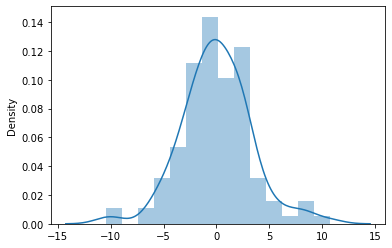

In [47]:
sns.distplot(MLR_model.resid)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [49]:

# type your code here


# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model along with the intercept
test = sms.het_breuschpagan(MLR_model.resid, MLR_model.model.exog)

# the test retuns 4 outputs, the last value is the p-value of the f-statistic
# print the p-value
print('p-value:', test[3])

# print the decision
if test[3] < 0.05:
    print('Heteroskedasticity is present in the data.')
else: 
    print('Homoskedasticity is present in the data.')


p-value: 0.11374698255203312
Homoskedasticity is present in the data.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here

X = df_lifeExp.iloc[:,1:16]


# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)


# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_full_model_ni = sm.OLS(y,X).fit()

# print the model summary
print(MLR_full_model_ni.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sun, 13 Feb 2022   Prob (F-statistic):                   4.84e-108
Time:                        11:16:33   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [51]:
# load the csv file
# type your code here

df_FEV = pd.read_csv('LungCapdata.csv')

df_FEV.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

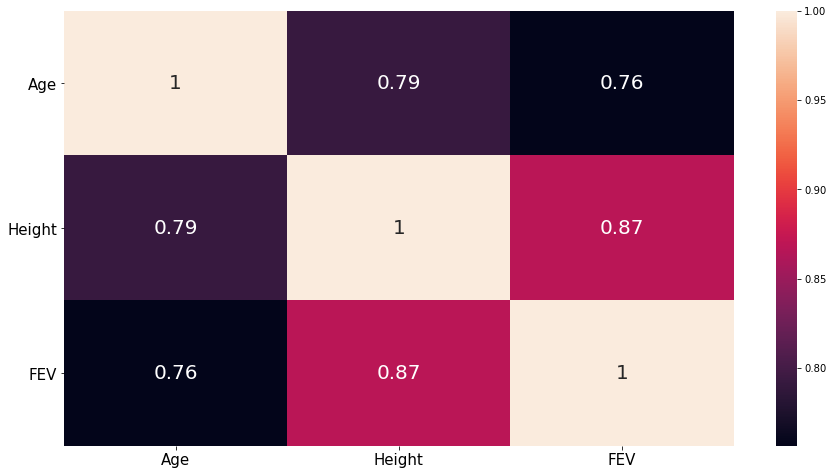

In [53]:
# type your code here

# set dimensions for the plot figure
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_FEV_num = df_FEV[["Age","Height", "FEV"]]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_FEV_num.corr(), annot = True, annot_kws = {"size": 20})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here

X = df_FEV["Smoke"]

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# consider the dependent variable
y = df_FEV["FEV"]

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
LM_model = sm.OLS(y, sm.add_constant(X)).fit()

# print the summary output
print(LM_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     41.79
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.99e-10
Time:                        11:47:38   Log-Likelihood:                -813.88
No. Observations:                 654   AIC:                             1632.
Df Residuals:                     652   BIC:                             1641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5661      0.035     74.037      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
df_FEV['Smoke'] = df_FEV['Smoke'].astype(object)
df_FEV['Age'] = df_FEV['Age'].astype(object)


In [60]:
# type your code here

df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)


df_FEV_cat = df_FEV.select_dtypes(include=object)

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_FEV_num, dummy_variables],axis=1)

# consider the dependent variable
y = df_FEV["FEV"]

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y, sm.add_constant(X)).fit()

# print the summary output
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          5.35e-202
Time:                        11:57:05   Log-Likelihood:                -319.59
No. Observations:                 654   AIC:                             679.2
Df Residuals:                     634   BIC:                             768.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4196      0.380    -11.627      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here

#Durbin watson is 1.679
# signifies that the error terms are slightly serially +ve

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

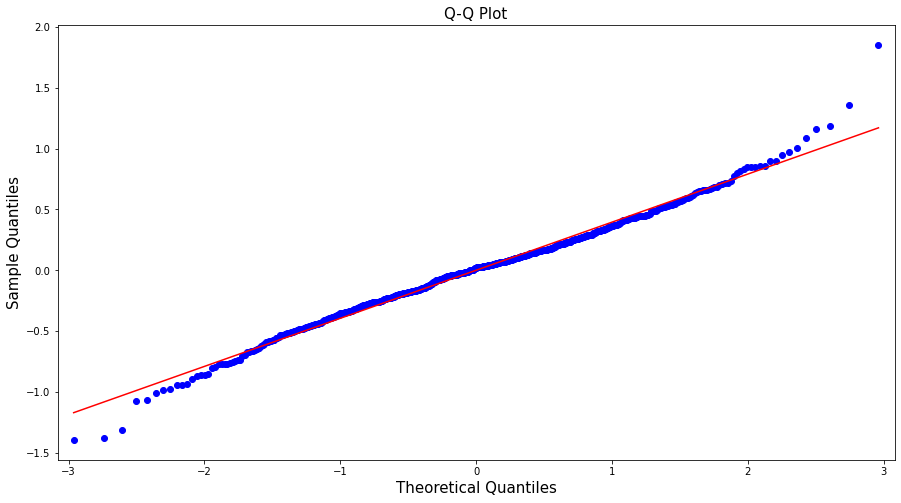

In [62]:
# type your code here

plt.rcParams['figure.figsize'] = (15,8)

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

# Data is Normal


<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here

df_FEV['Smoke'] = df_FEV['Smoke'].astype(object)
df_FEV['Age'] = df_FEV['Age'].astype(object)


df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)


df_FEV_cat = df_FEV.select_dtypes(include=object)

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_FEV_num, dummy_variables],axis=1)
X= sm.add_constant(X)

# consider the dependent variable
y = df_FEV["FEV"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

# fit a full model using fit()
MLR_model = sm.OLS(y, X).fit()


In [65]:
# predict the y values
y_pred = MLR_model.predict(X_test)

# calculating the MSE for the test data and then rounding the value upto 4 digits
mse_test = round(mean_squared_error(y_test, y_pred),4)

# printing the mse for the test set
print("Mean Squared Error (MSE): ", mse_test)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# printing the rmse for the test set
print("Root Mean Squared Error (RMSE): ", rmse_test)


Mean Squared Error (MSE):  0.1554
Root Mean Squared Error (RMSE):  0.3942


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
# type your code here

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)


mae_test = round(mean_absolute_error(y_test, y_pred),4)

# printing the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

# Calculating the MAPE using the "mape()" function created above

# calculating the MAPE for the  data and then rounding the value upto 4 digits
mape_test = round(mape(y_test, y_pred),4)

# printing the mape for the tra set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

# Dont compare the metrics
# the dimensions wont be same
# Use RMSE and Mape

Mean Absolute Error (MAE) on test set:  0.303
Mean Absolute Percentage Error (MAPE) on test set:  12.0255


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
# type your code here


df_FEV['Smoke'] = df_FEV['Smoke'].astype(object)
df_FEV['Age'] = df_FEV['Age'].astype(object)


df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)


df_FEV_cat = df_FEV.select_dtypes(include=object)

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_FEV_num, dummy_variables],axis=1)
X= sm.add_constant(X)

# consider the dependent variable
y = df_FEV["FEV"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

# fit a full model using fit()
MLR_model = sm.OLS(y, X).fit()


In [72]:
train_pred = MLR_model.predict(X_train)

test_pred = MLR_model.predict(X_test)

In [73]:
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)

# printing the rmse for the train set
print("\n Root Mean Squared Error (RMSE) on train set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# printing the rmse for the test set
print("\n Root Mean Squared Error (RMSE) on test set: ", rmse_test)



 Root Mean Squared Error (RMSE) on train set:  0.3945

 Root Mean Squared Error (RMSE) on test set:  0.3942


In [ ]:
# Model is not overfitted since RMSE is high